In [1]:
%run 1.Functions.ipynb
%run Old_Functions.ipynb

In [38]:
N = 4
P = number_of_variables(N)
path = "/Users/mahshid/Documents/ML_Algebra/Database/{}/{}_errors/".format(N,N)

df_knn = pd.read_csv(path + "4_KNN_errors.csv", index_col=0)
df_svm = pd.read_csv(path + "4_SVM_errors.csv", index_col=0)
df_mlp = pd.read_csv(path + "4_MLP_errors.csv", index_col=0)
df_dt = pd.read_csv(path + "4_DT_errors.csv", index_col=0)
df_lr = pd.read_csv(path + "4_LR_errors.csv", index_col=0)

with open(path + 'T_KNN_test.pickle'.format(i), 'rb') as handle:
    T_KNN = pickle.load(handle)
        
with open(path + 'P_KNN_test.pickle'.format(i), 'rb') as handle:
    P_KNN = pickle.load(handle)   
    
with open(path + 'P_SVM_test.pickle'.format(i), 'rb') as handle:
    P_SVM = pickle.load(handle)  
    
with open(path + 'T_SVM_test.pickle'.format(i), 'rb') as handle:
    T_SVM = pickle.load(handle)  
    
with open(path + 'P_MLP_test.pickle'.format(i), 'rb') as handle:
    P_MLP = pickle.load(handle)  
    
with open(path + 'T_MLP_test.pickle'.format(i), 'rb') as handle:
    T_MLP = pickle.load(handle) 

with open(path + 'P_LR_test.pickle'.format(i), 'rb') as handle:
    P_LR = pickle.load(handle)  
    
with open(path + 'T_LR_test.pickle'.format(i), 'rb') as handle:
    T_LR = pickle.load(handle)     
    
with open(path + 'P_DT_test.pickle'.format(i), 'rb') as handle:
    P_DT = pickle.load(handle)  
    
with open(path + 'T_DT_test.pickle'.format(i), 'rb') as handle:
    T_DT = pickle.load(handle)     

In [5]:
x1 = 0
x2 = 10000
Ideals = []
for i in range(x1,x2):
    with open(path_ideals + 'Ideal{}.pickle'.format(i), 'rb') as handle:
        I = pickle.load(handle)
        Ideals.append(I) 

## Using value q in Volume for Errors

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def v_scores(I):
    All_moves = []                                      # compute all possible moves
    for i in range(2,len(P.gens()) + 1):
        for j in range(1,i):
            All_moves.append([i,j])       
    Moves = []   
    Ideal = ideal(f for f in I)                        
    GB = Ideal.groebner_basis() 
    H = Fast_Monomial_Completion(LT_I(GB))     
    d = max_deg(H)
    
    for move in All_moves:                              # Choosing a MOVE
        transformation = Transformation(I, move)        # Do the transformation on the ideal   
        Ideal = ideal(f for f in transformation)                        
        GB = Ideal.groebner_basis() 
        H = Fast_Monomial_Completion(LT_I(GB))     # Monomial Janet basis for the ideal after transfrmation
        v = Volume_Polynomial_Pommaret2(H, 10 * d)
        #V = Coefficients(v, len(P.gens())-1)
        Moves.append([move,  v])  
    #Moves = sorted(Moves, key=lambda x: x[1])      
    return  Moves

def f(m, move):   #score of a move in m
    for i in range(len(m[1])):
        if m[1][i][0] == move:
            return m[1][i][1]

def mo(n):
    moves = [2,1],[3,1],[3,2],[4,1],[4,2],[4,3]
    return moves[n-1]


def B_score(B1, B2):  #B1: numerator, B2: denominator
    for i in range(len(B1)):
        if B1[i] != B2[i] and B1[i]!=0 and B2[i]!=0:
            return round(B1[i]/B2[i],2)
        elif B1[i]==0 or B2[i]==0:
            return 0
        elif B1 == B2:
            return 1
        

In [14]:
x1 = 0
x2 = 10000
Ideals = []
for i in range(x1,x2):
    with open(path_ideals + 'Ideal{}.pickle'.format(i), 'rb') as handle:
        I = pickle.load(handle)
        Ideals.append(I) 
        
        

In [15]:
M = []
for i in tqdm.tqdm(index):
    m = [i,v_scores(Ideals[i])]
    M.append(m)
    

    
    with open(path + 'scores/{}_scores.pickle'.format(i), 'wb') as handle:
        pickle.dump(m , handle, protocol=pickle.HIGHEST_PROTOCOL) 

100%|██████████| 528/528 [15:59<00:00,  1.82s/it]


In [36]:

MV = []
for i in tqdm.tqdm(index):
    with open(path + 'scores/{}_scores.pickle'.format(i), 'rb') as handle:
        m = pickle.load(handle)
        MV.append(m)

100%|██████████| 528/528 [00:00<00:00, 2920.02it/s]


In [39]:
T = T_KNN   # for Volume
P = P_KNN
M = MV
indices = list(df_knn.index)
S1 = []
for i in range(len(indices)):
    e = [l[0] for l in M].index(indices[i])
    r = np.random.choice(6 ,size = 1, p = [0.035 , 0.1833 , 0.041 , 0.4697 , 0.199 , 0.072])
    S1.append([f(M[e], mo(T[i])), f(M[e],mo(P[i])), f(M[e],mo(r[0]))])

    
SS = [[float(s[1]/s[0]), float(s[2]/s[0])] for s in S1] # [V_M/V_T,   V_R/V_T]

S = sorted(SS, key=lambda x: x[0]) 


#plt.plot(np.arange(len(T)), [s[2] for s in S], color = 'gray', alpha = 0.5)
#plt.scatter(np.arange(len(T)), [s[1] for s in S] , s=10)
plt.scatter(np.arange(len(T)), [s[0] for s in S], color = 'red', s=10, alpha = 0.5) 
#plt.show()
#plt.title('KNN')
plt.savefig(path + "knn_v.png")
plt.show()
plt.scatter(np.arange(len(T)), sorted([s[1] for s in S]) , s=8)
plt.savefig(path + "knn_random.png")
c = 0
e = 0
for s in S:
    if s[0]>s[1]:
        c+=1
    elif s[0] == s[1]:
        e += 1
c_lr = round(c/len(S),2) 
e_lr = round(e/len(S),2)    
print(c_lr)
print(e_lr)

ValueError: 6914 is not in list

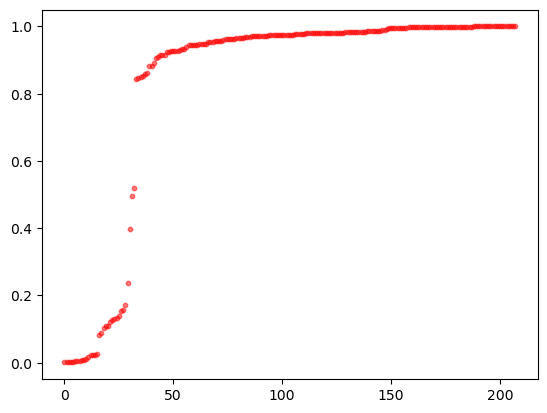

0.57
0.19


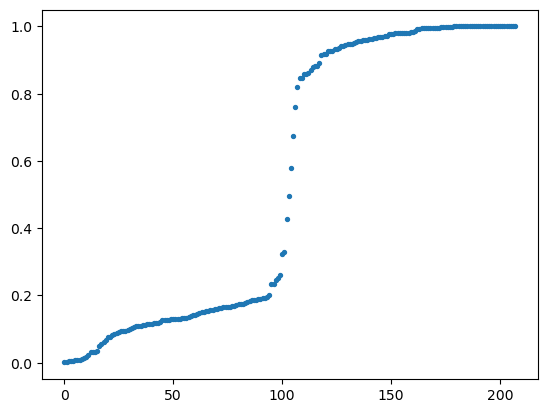

In [24]:
T = T_SVM   # for Volume
P = P_SVM
M = MV
indices = list(df_svm.index)
S1 = []
for i in range(len(indices)):
    e = [l[0] for l in M].index(indices[i])
    r = np.random.choice(6 ,size = 1, p = [0.035 , 0.1833 , 0.041 , 0.4697 , 0.199 , 0.072])
    S1.append([f(M[e], mo(T[i])), f(M[e],mo(P[i])), f(M[e],mo(r[0]))])

    
SS = [[float(s[1]/s[0]), float(s[2]/s[0])] for s in S1] # [V_M/V_T,   V_R/V_T]

S = sorted(SS, key=lambda x: x[0]) 


#plt.plot(np.arange(len(T)), [s[2] for s in S], color = 'gray', alpha = 0.5)
#plt.scatter(np.arange(len(T)), [s[1] for s in S] , s=10)
plt.scatter(np.arange(len(T)), [s[0] for s in S], color = 'red', s=10, alpha = 0.5) 
#plt.show()
#plt.title('KNN')
plt.savefig(path + "svm_v.png")
plt.show()
plt.scatter(np.arange(len(T)), sorted([s[1] for s in S]) , s=8)
plt.savefig(path + "svm_random.png")
c = 0
e = 0
for s in S:
    if s[0]>s[1]:
        c+=1
    elif s[0] == s[1]:
        e += 1
c_lr = round(c/len(S),2) 
e_lr = round(e/len(S),2)    
print(c_lr)
print(e_lr)

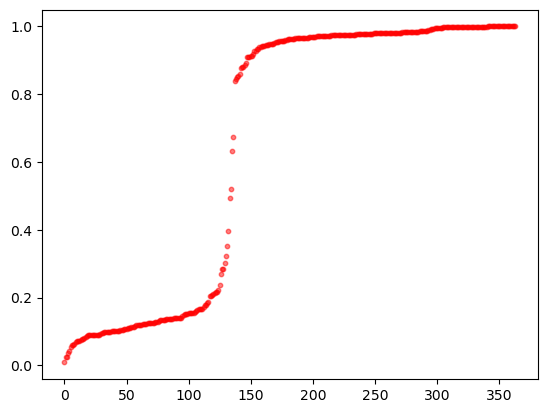

0.5
0.17


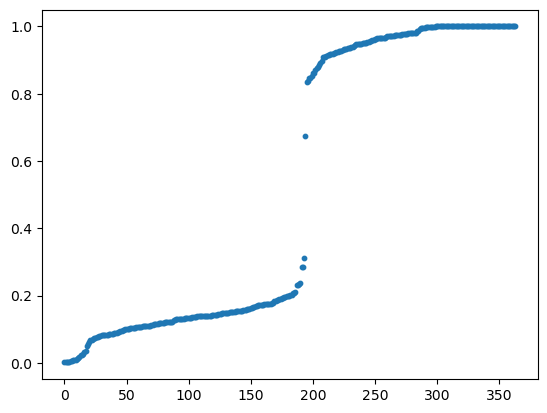

In [22]:
T = T_MLP   # for Volume
P = P_MLP
M = MV
indices = list(df_mlp.index)
S1 = []
for i in range(len(indices)):
    e = [l[0] for l in M].index(indices[i])
    r = np.random.choice(6 ,size = 1, p = [0.035 , 0.1833 , 0.041 , 0.4697 , 0.199 , 0.072])
    S1.append([f(M[e], mo(T[i])), f(M[e],mo(P[i])), f(M[e],mo(r[0]))])

    
SS = [[float(s[1]/s[0]), float(s[2]/s[0])] for s in S1] # [V_M/V_T,   V_R/V_T]

S = sorted(SS, key=lambda x: x[0]) 


#plt.plot(np.arange(len(T)), [s[2] for s in S], color = 'gray', alpha = 0.5)
#plt.scatter(np.arange(len(T)), [s[1] for s in S] , s=10)
plt.scatter(np.arange(len(T)), [s[0] for s in S], color = 'red', s=10, alpha = 0.5) 
#plt.show()
#plt.title('KNN')
plt.savefig(path + "mlp_v.png")

plt.show()
plt.scatter(np.arange(len(T)), sorted([s[1] for s in S]) , s=10)
plt.savefig(path + "mlp_random.png")
c = 0
e = 0
for s in S:
    if s[0]>s[1]:
        c+=1
    elif s[0] == s[1]:
        e += 1
c_lr = round(c/len(S),2) 
e_lr = round(e/len(S),2)    
print(c_lr)
print(e_lr)

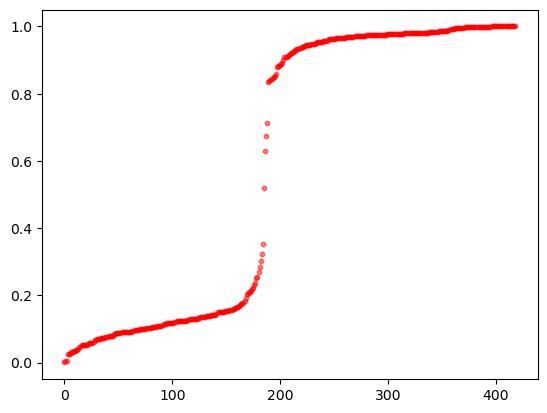

0.45
0.15


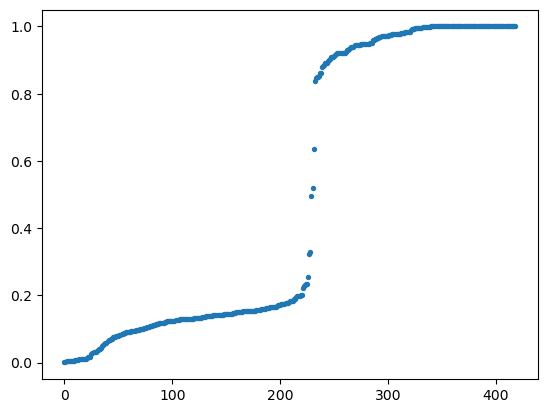

In [23]:
T = T_DT   # for Volume
P = P_DT
M = MV
indices = list(df_dt.index)
S1 = []
for i in range(len(indices)):
    e = [l[0] for l in M].index(indices[i])
    r = np.random.choice(6 ,size = 1, p = [0.035 , 0.1833 , 0.041 , 0.4697 , 0.199 , 0.072])
    S1.append([f(M[e], mo(T[i])), f(M[e],mo(P[i])), f(M[e],mo(r[0]))])

    
SS = [[float(s[1]/s[0]), float(s[2]/s[0])] for s in S1] # [V_M/V_T,   V_R/V_T]

S = sorted(SS, key=lambda x: x[0]) 


#plt.plot(np.arange(len(T)), [s[2] for s in S], color = 'gray', alpha = 0.5)
#plt.scatter(np.arange(len(T)), [s[1] for s in S] , s=10)
plt.scatter(np.arange(len(T)), [s[0] for s in S], color = 'red', s=10, alpha = 0.5) 
#plt.show()
#plt.title('KNN')
plt.savefig(path + "dt_v.png")

plt.show()
plt.scatter(np.arange(len(T)), sorted([s[1] for s in S]) , s=8)
plt.savefig(path + "dt_random.png")
c = 0
e = 0
for s in S:
    if s[0]>s[1]:
        c+=1
    elif s[0] == s[1]:
        e += 1
c_lr = round(c/len(S),2) 
e_lr = round(e/len(S),2)    
print(c_lr)
print(e_lr)

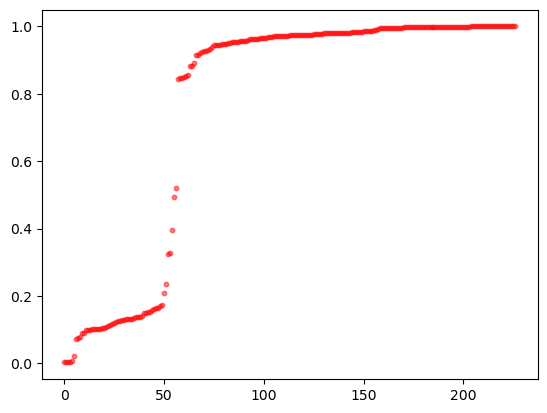

0.6
0.15


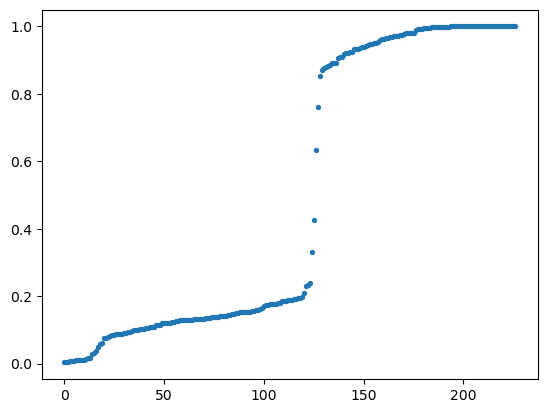

In [28]:
T = T_LR   # for Volume
P = P_LR
M = MV
indices = list(df_lr.index)
S1 = []
for i in range(len(indices)):
    e = [l[0] for l in M].index(indices[i])
    r = np.random.choice(6 ,size = 1, p = [0.035 , 0.1833 , 0.041 , 0.4697 , 0.199 , 0.072])
    S1.append([f(M[e], mo(T[i])), f(M[e],mo(P[i])), f(M[e],mo(r[0]))])

    
SS = [[float(s[1]/s[0]), float(s[2]/s[0])] for s in S1] # [V_M/V_T,   V_R/V_T]

S = sorted(SS, key=lambda x: x[0]) 


#plt.plot(np.arange(len(T)), [s[2] for s in S], color = 'gray', alpha = 0.5)
#plt.scatter(np.arange(len(T)), [s[1] for s in S] , s=10)
plt.scatter(np.arange(len(T)), [s[0] for s in S], color = 'red', s=10, alpha = 0.5) 
#plt.show()
#plt.title('KNN')
plt.savefig(path + "lr_v.png")

plt.show()
plt.scatter(np.arange(len(T)), sorted([s[1] for s in S]) , s=8)
plt.savefig(path + "lr_random.png")
c = 0
e = 0
for s in S:
    if s[0]>s[1]:
        c+=1
    elif s[0] == s[1]:
        e += 1
c_lr = round(c/len(S),2) 
e_lr = round(e/len(S),2)    
print(c_lr)
print(e_lr)

# information on Pommaret Bases

In [104]:
i = 1915

with open('old/{}/all_ideals{}.pickle'.format(i,i), 'rb') as handle:
    all_ideals1 = pickle.load(handle)       
    
with open('old/{}/all_moves{}.pickle'.format(i,i), 'rb') as handle:
    all_moves1 = pickle.load(handle)  

In [105]:
i = 1821

with open('old/{}/all_ideals{}.pickle'.format(i,i), 'rb') as handle:
    all_ideals2 = pickle.load(handle)       
    
with open('old/{}/all_moves{}.pickle'.format(i,i), 'rb') as handle:
    all_moves2 = pickle.load(handle)

In [106]:
i = 2941

with open('old/{}/all_ideals{}.pickle'.format(i,i), 'rb') as handle:
    all_ideals3 = pickle.load(handle)       
    
with open('old/{}/all_moves{}.pickle'.format(i,i), 'rb') as handle:
    all_moves3 = pickle.load(handle)     

In [107]:
i = 3004

with open('old/{}/all_ideals{}.pickle'.format(i, 3003), 'rb') as handle:
    all_ideals4 = pickle.load(handle)       
    
with open('old/{}/all_moves{}.pickle'.format(i, 3003), 'rb') as handle:
    all_moves4 = pickle.load(handle)  

In [108]:
i = 4480

with open('old/{}/all_ideals{}.pickle'.format(i,i), 'rb') as handle:
    all_ideals5 = pickle.load(handle)       
    
with open('old/{}/all_moves{}.pickle'.format(i,i), 'rb') as handle:
    all_moves5 = pickle.load(handle)     

In [109]:
i = 5471

with open('old/{}/all_ideals{}.pickle'.format(i,5470), 'rb') as handle:
    all_ideals6 = pickle.load(handle)       
    
with open('old/{}/all_moves{}.pickle'.format(i,5470), 'rb') as handle:
    all_moves6 = pickle.load(handle)   

In [110]:
i = 6561

with open('old/{}/all_ideals{}.pickle'.format(i,6560), 'rb') as handle:
    all_ideals7 = pickle.load(handle)       
    
with open('old/{}/all_moves{}.pickle'.format(i,6560), 'rb') as handle:
    all_moves7 = pickle.load(handle) 

In [111]:
i = 7874

with open('old/{}/all_ideals{}.pickle'.format(i,7873), 'rb') as handle:
    all_ideals8 = pickle.load(handle)       
    
with open('old/{}/all_moves{}.pickle'.format(i,7873), 'rb') as handle:
    all_moves8 = pickle.load(handle)

In [119]:
i = 8613

with open('old/{}/all_ideals{}.pickle'.format(i,i-1), 'rb') as handle:
    all_ideals9 = pickle.load(handle)       
    
with open('old/{}/all_moves{}.pickle'.format(i,i-1), 'rb') as handle:
    all_moves9 = pickle.load(handle)

In [117]:
i = 9508

with open('old/{}/all_ideals{}.pickle'.format(i,i), 'rb') as handle:
    all_ideals10 = pickle.load(handle)       
    
with open('old/{}/all_moves{}.pickle'.format(i,i), 'rb') as handle:
    all_moves10 = pickle.load(handle)

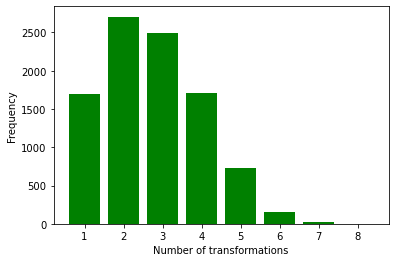

In [126]:
all_ideals = all_ideals1 + all_ideals2 + all_ideals4 + all_ideals5 + all_ideals6 + all_ideals7 + all_ideals8 + all_ideals9 + all_ideals10 
all_moves = all_moves1 + all_moves2  + all_moves4 + all_moves5 + all_moves6 + all_moves7 + all_moves8 + all_moves9 + all_moves10


terms = []
n_transformations = []
for i in range(len(all_ideals)):
    terms.append([ num_terms(all_ideals[i][0]),   num_terms(all_ideals[i][-1])])
    n_transformations.append(len(all_moves[i]))
    
from collections import Counter
numbers = n_transformations
frequency = Counter(numbers)


# Get the unique numbers and their corresponding frequencies
unique_numbers = sorted(list(frequency.keys()))
frequency_counts = [frequency[num] for num in unique_numbers]

# Generate x-axis values
x = list(range(1, len(unique_numbers) + 1))

# Create the bar plot
plt.bar(x, frequency_counts, color = "green")

# Set x-axis tick labels
plt.xticks(x, unique_numbers)

# Add labels and title
plt.xlabel('Number of transformations')
plt.ylabel('Frequency')
plt.savefig("Number_of_Transformations (GB as input).png")   
# Display the plot